# Data Collecting / **Cleaning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from matplotlib import cm
import plotly.graph_objects as go
import mpl_toolkits.mplot3d as axes3d

In [ ]:
def load_data():
  return pd.read_csv("Visa_For_Lisa_Loan_Modelling.csv")
load_data = load_data()

# Data *Exploration*

In [ ]:
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print("Statistical summary:")
    print(dataset.describe())

print_summarize_dataset(load_data)

Dataset dimension:
(5000, 14)
First 10 rows of dataset:
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  Credi

In [ ]:
def clean_dataset(data):
    data.dropna(axis=0, inplace=True)
    return data

clean_data = clean_dataset(load_data)

In [ ]:
print(clean_data.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [ ]:
clean_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
clean_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Data Visualization

In [ ]:
def print_histograms(dataset):
  fig = px.histogram(dataset["Age"])
  fig.show()
  fig = px.histogram(dataset["Securities Account"])
  fig.show()
  fig = px.histogram(dataset["Income"])
  fig.show()
  fig = px.histogram(dataset["CreditCard"])
  fig.show()
  fig = px.histogram(dataset["Mortgage"])
  fig.show()
print_histograms(clean_data)

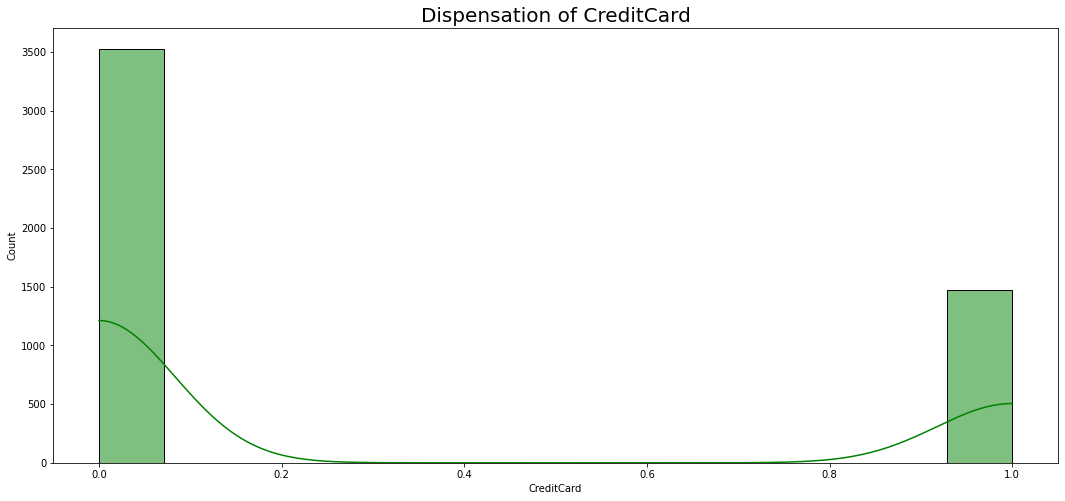

In [ ]:
def freq_of_credit_card(dataset):
    plt.figure(figsize = (18, 8))
    plt.title('Dispensation of CreditCard', fontsize=20)
    sns.histplot(data=dataset, x="CreditCard", kde=True, color="g")
    plt.show()

freq_of_credit_card(clean_data)

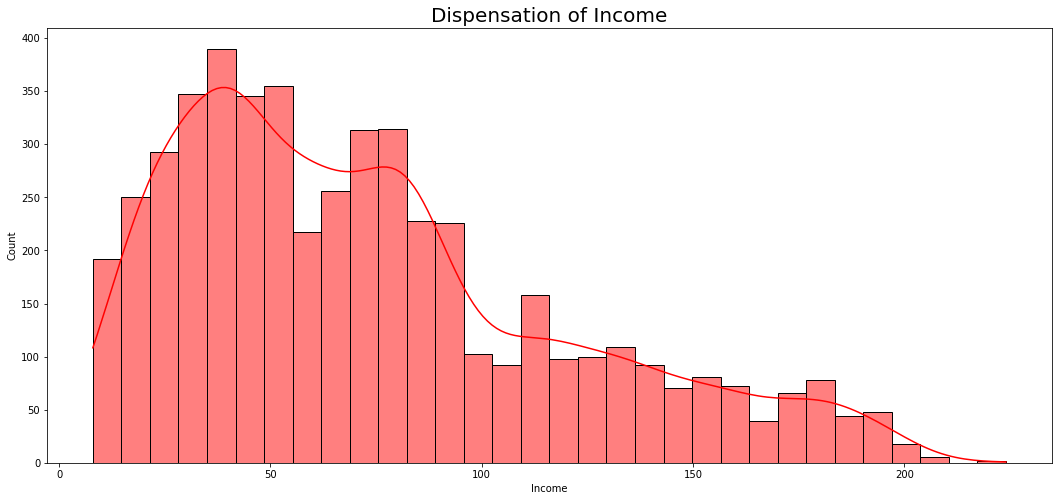

In [ ]:
def freq_of_Income(dataset):
    plt.figure(figsize = (18, 8))
    plt.title('Dispensation of Income', fontsize=20)
    sns.histplot(data=dataset, x="Income", kde=True, color="r")
    plt.show()

freq_of_Income(clean_data)

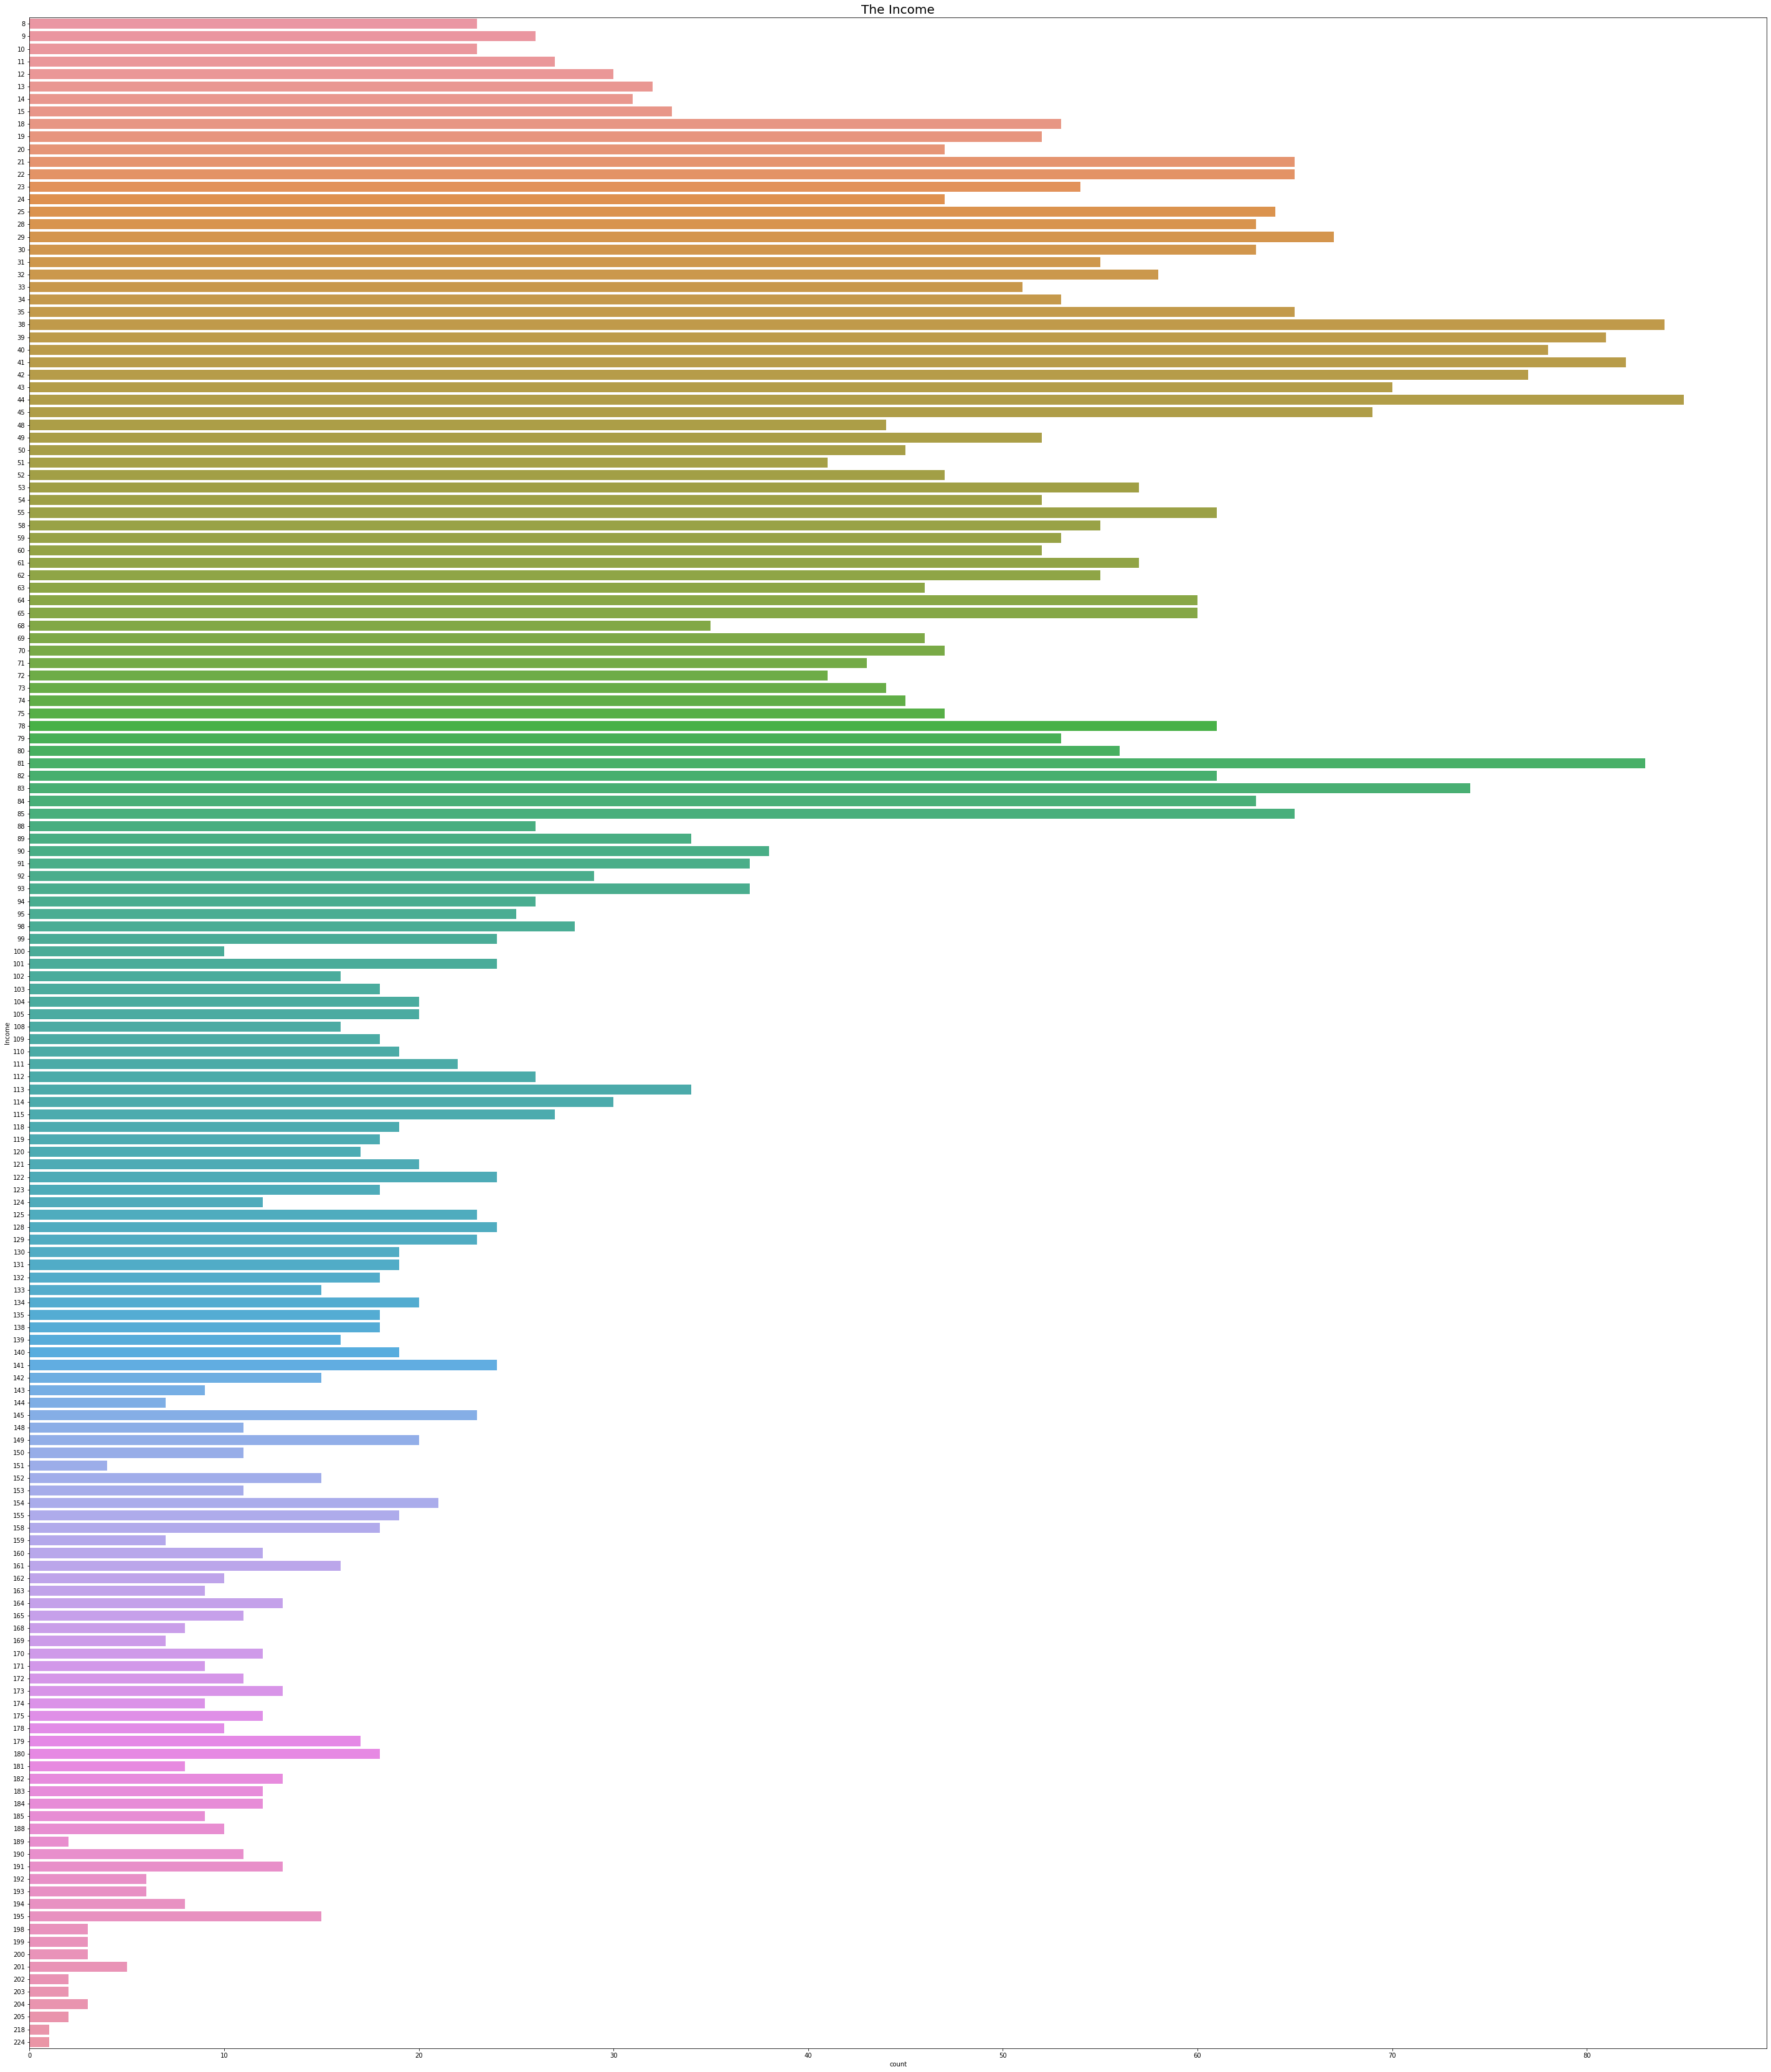

In [ ]:
def get_bank_income(dataframe):
    plt.figure(figsize=(50, 60))
    plt.title('The Income', fontsize = 20)
    sns.countplot(y='Income', data=dataframe)

get_bank_income(clean_data)

In [ ]:
def my_area(clean_dataset):
  fig = px.area(clean_dataset["Income"], facet_col=clean_dataset["CreditCard"], facet_col_wrap=8, title="Category Rating")
  fig.show()
my_area(clean_data)

In [ ]:
def my_star_figure(clean_dataset):
  fig = go.Figure()
  fig.add_trace(go.Scatter(
      name="Raw Data",
      mode="markers", x=clean_dataset["Income"], y=clean_dataset["Age"],
      marker_symbol="star"
  ))
  fig.update_xaxes(showgrid=True, ticklabelmode="period")
  fig.show()
my_star_figure(clean_data)

In [ ]:
def my_scttater_figure(clean_dataset):
  fig = go.Figure()
  fig.add_trace(go.Scatter(
      name="Raw Data",
      mode="markers", x=clean_dataset["Personal Loan"], y=clean_dataset["Income"],
      marker_symbol="circle-dot"
  ))
  fig.update_xaxes(showgrid=True, ticklabelmode="period")
  fig.show()
my_scttater_figure(clean_data)

In [ ]:
def my_area(clean_dataset):
  fig = px.area(clean_dataset["Personal Loan"], facet_col=clean_dataset["Education"], facet_col_wrap=8, title="Category Rating")
  fig.show()
my_area(clean_data)

In [ ]:
def my_3d_one():
    fig = px.scatter_3d(clean_data,x='Age', y='Income', z='Education')
    fig.show()
my_3d_one()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(clean_data,x='CreditCard', y='Income', z='Education')
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
    x=clean_data['Securities Account'],
    y=clean_data['Personal Loan'],
    mode='markers',
    marker=dict(size=clean_data['Mortgage'],
                color=clean_data['Income'])
))

fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
    x=clean_data['Experience'],
    y=clean_data['Education'],
    mode='markers',
    marker=dict(size=clean_data['Mortgage'],
                color=clean_data['Income'])
))

fig.show()

In [ ]:
 def print_scatter_matrix(dataset):
  fig = px.scatter_matrix(dataset)
  fig.update_layout(
      title='visa for lisa dataset',
      dragmode='select',
      width=1050,
      height=1055,
      hovermode='closest',
  )
  fig.show()
print_scatter_matrix(clean_data)

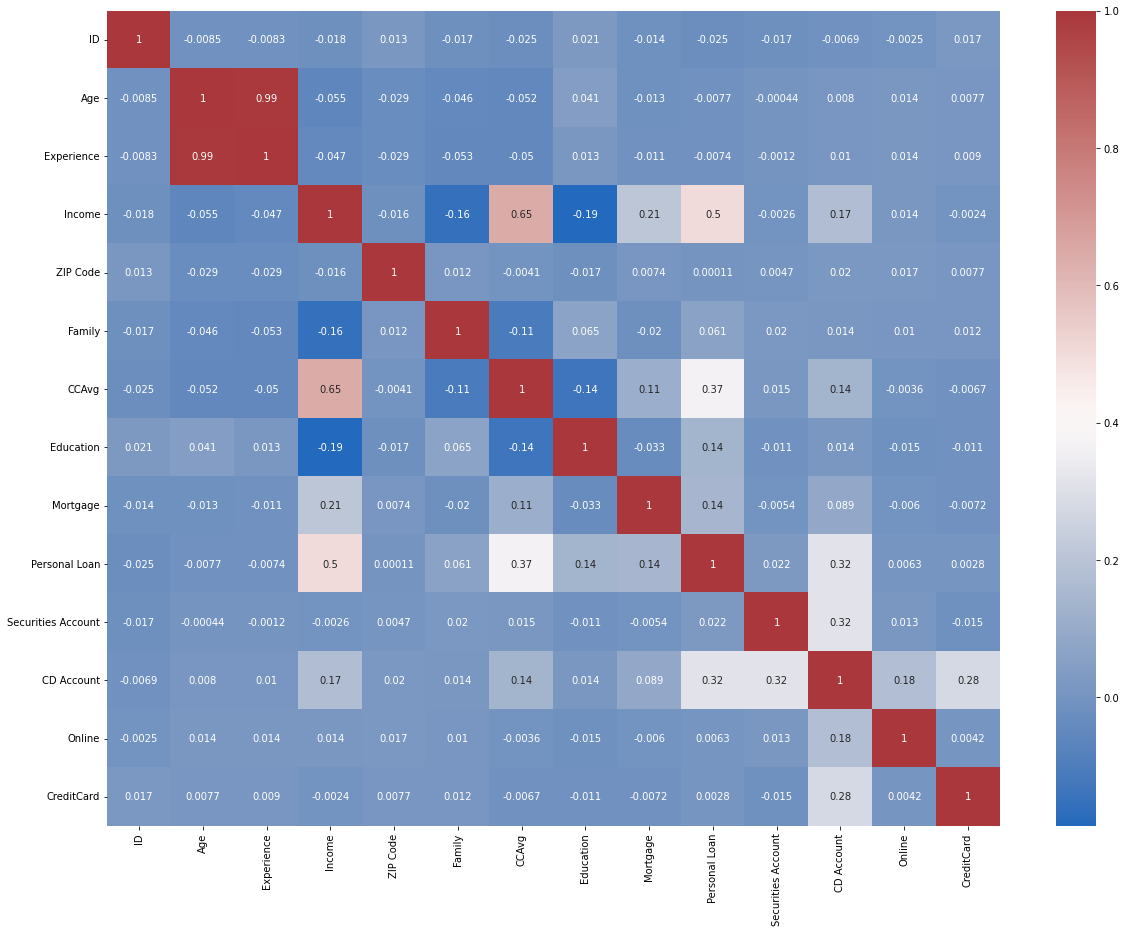

In [ ]:
def compute_correlations_matrix(dataset):
    corrMatrix = dataset.corr()
    plt.figure(figsize=(20,15))
    sns.heatmap(corrMatrix, annot=True, cmap='vlag')
    plt.show()

compute_correlations_matrix(clean_data)

<h1>Machine Learning

In [ ]:
array = clean_data.values

X = np.array(array[:,:9])
y = np.array(array[:,13])

In [ ]:
def h(x, theta):
  return np.dot(x,theta)

In [ ]:
class LeastSquaresRegression():
    def __init__(self,):
        self.theta_ = None

    def fit(self, X, y):
        # Calculates theta that minimizes the MSE and updates self.theta_

        part_1 = np.dot(X.T,X)
        part_2 = np.dot(X.T, y)
        my_inv = np.linalg.inv(part_1)
        self.theta_ = np.dot(my_inv, part_2)

    def predict(self, X):
        return h(X, self.theta_)

In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
model = LeastSquaresRegression()
model.fit(X_train,Y_train)
model.theta_

array([ 7.20844001e-06, -9.98131030e-04,  1.59992496e-03,  1.43572413e-05,
        3.18262010e-06,  4.47880129e-03, -1.10511111e-03, -8.44432436e-03,
        1.50326882e-05])

In [ ]:
y_predic = model.predict(X_train)
y_predic

array([0.30176407, 0.26246305, 0.32421431, ..., 0.29386706, 0.31429552,
       0.26964178])

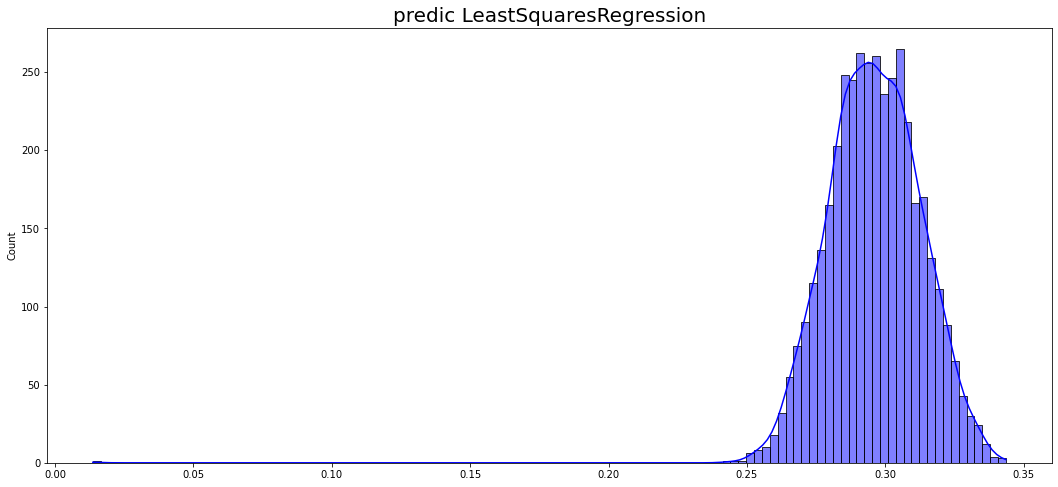

In [ ]:
def predic_LeastSquaresRegression(dataset):
    plt.figure(figsize = (18, 8))
    plt.title('predic LeastSquaresRegression', fontsize=20)
    sns.histplot(data=dataset,kde=True, color="b")
    plt.show()

predic_LeastSquaresRegression(y_predic)

In [ ]:
# def f(x):
#   a = np.array([[2], [6]])
#   return 3 + np.dot((x-a).T,(x-a))

# x = np.arange(-5,100)
# y = np.arange(-5,100)
# # x.shape
# X,Y = np.meshgrid(x,y)
# x_line = np.ravel(X).reshape(1,11025)
# y_line = np.ravel(Y).reshape(1,11025)

# x_input = np.append(x_line,y_line,axis=0)
# z = f(x_input)
# z = np.diagonal(z)

# Z = z.reshape(X.shape)

# grad_z = np.diagonal(f(y_predic))

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Helix equation
t = np.linspace(0, 10, 50)
x, y, z = np.cos(t), np.sin(t), t

fig = go.Figure(data=[go.Scatter3d(x=Y_train, y=y_predic, z=X_train[:,1],
                                   mode='markers')])
fig.show()

In [ ]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np
np.random.seed(1)

N = 100
random_x = X_train
random_y0 = y_predic
random_y1 = Y_train
random_y2 = Y_train

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='markers',
                    name='X_train and y_predic'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines+markers',
                    name='X_train and Y_train'))
# fig.add_trace(go.Scatter(x=random_x, y=random_y2,
#                     mode='lines',
#                     name='lines'))

fig.show()

In [ ]:
def f(x):
  a = np.array([[2], [6]])
  return 3 + np.dot((x-a).T,(x-a))

In [ ]:
array = clean_data.values

X = np.array(array[:,:9])
y = np.array(array[:,13])
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

model1 = DecisionTreeClassifier()

model2 = GaussianNB()

model3 = KNeighborsClassifier()

model4 = LogisticRegression(solver='liblinear', multi_class='ovr')

model5 = LinearDiscriminantAnalysis()

kf = KFold(n_splits=2)
cv_results1 = cross_val_score(model1, X_train, Y_train, cv=kf.get_n_splits(X), scoring='accuracy')
cv_results2 = cross_val_score(model2, X_train, Y_train, cv=kf.get_n_splits(X), scoring='accuracy')
cv_results3 = cross_val_score(model3, X_train, Y_train, cv=kf.get_n_splits(X), scoring='accuracy')
cv_results5 = cross_val_score(model5, X_train, Y_train, cv=kf.get_n_splits(X), scoring='accuracy')

In [ ]:
print(f"DecisionTree:{cv_results1[0]} {cv_results1[1]}")
print(f"GaussianNB:{cv_results2[0]} {cv_results2[1]}")
print(f"KNeighborsClassifier:{cv_results3[0]} {cv_results3[1]}")
print(f"LinearDiscriminantAnalysis:{cv_results5[0]} {cv_results5[1]}")

DecisionTree:0.577 0.58
GaussianNB:0.701 0.7035
KNeighborsClassifier:0.642 0.6345
LinearDiscriminantAnalysis:0.704 0.7035


In [ ]:
model1.fit(X_train,Y_train)
model2.fit(X_train,Y_train)
model3.fit(X_train,Y_train)
model5.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [ ]:
print(f"DecisionTreeClassifier predic:{model1.predict(X_train)}")
print(f"GaussianNB predic:{model2.predict(X_train)}")
print(f"KNeighbors:{model3.predict(X_train)}")
print(f"LinearDiscriminant:{model5.predict(X_train)}")

DecisionTreeClassifier predic:[0. 0. 0. ... 1. 0. 0.]
GaussianNB predic:[0. 0. 0. ... 0. 0. 0.]
KNeighbors:[0. 0. 0. ... 1. 1. 0.]
LinearDiscriminant:[0. 0. 0. ... 0. 0. 0.]
